# Graph (network) Analysis

Consider this just as an example of how to create a graph for a petroleum refinery (o any other complex system) from its process block diagram.

The [Talara Refinery](https://www.refineriatalara.com/esquema-de-proceso/) has 16 processing units and five auxiliary unit and complementary service packages, two liquid loading docks, and 21 new storage tanks, making it one of the most modern deep conversion refineries in Latin America

In [1]:
# Libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## Creating the graph

In [2]:
# Create a directed graph
G = nx.DiGraph()

Nodes are the process units and edges are the process streams.

In [3]:
# DP1
G.add_edge("Crude", "DP1", label='crude', flow=573705)

In [4]:
# DV3
G.add_edge("DP1", "DV3", label='atm-residue', flow=342004)

In [5]:
# RG2
G.add_edge("DP1", "RG2", label='light-naphtha', flow=67811)
G.add_edge("HTD", "RG2", label='wild-naptha', flow=1572)
G.add_edge("RCA", "RG2", label='lpg-from-rca', flow=1450)
G.add_edge("HTN", "RG2", label='offgas-from-htn', flow=2343)
G.add_edge("HTF", "RG2", label='offgas-from-htf', flow=247)
# G.add_edge("RCA", "RG2", label='offgasfromrca', flow=270) # two streams from RCA, multigraph does not supported, so liquid stream is considered
# G.add_edge("DP1", "RG2", label='offgas', flow=892) # two streams from DP1, multigraph does not supported, so liquid stream is considered

In [6]:
# TKT (T)
G.add_edge("DP1", "TKT", label='kerosene', flow=32780)

In [7]:
# HTN
G.add_edge("RG2", "HTN", label='stabilized-napththa', flow=47418)
G.add_edge("FCK", "HTN", label='coker-naphtha', flow=18148)
G.add_edge("RCA", "HTN", label='hydrogen-from-rca', flow=1678)

In [8]:
# RCA
G.add_edge("HTN", "RCA", label='hydrotreated-light-naphtha', flow=47736)

In [9]:
# HTD
G.add_edge("DP1", "HTD", label='diesel', flow=130500)
G.add_edge("FCC-RG1", "HTD", label='LCO', flow=57926)
G.add_edge("DV3", "HTD", label='LVGO', flow=27176)
G.add_edge("FCK", "HTD", label='LKGO', flow=21023)
G.add_edge("PHP", "HTD", label='hydrogen', flow=4275)

In [10]:
# FCC-RG1
G.add_edge("DV3", "FCC-RG1", label='HVGO', flow=124167)
G.add_edge("FCK", "FCC-RG1", label='HKGO', flow=32735)
G.add_edge("FCK", "FCC-RG1", label='lpg-from-fck', flow=5629)
G.add_edge("RG2", "FCC-RG1", label='lpg-from-rg2', flow=2511)

In [11]:
# HTF
G.add_edge("FCC-RG1", "HTF", label='naphtha-from-fcc', flow=49345)
G.add_edge("PHP", "HTF", label='hidrogen', flow=128)

In [12]:
# TGL
G.add_edge("FCC-RG1", "TGL", label='lpg-from-rg1', flow=18064)

In [13]:
# FCK
G.add_edge("DV3", "FCK", label='vac-residue', flow=158429)

In [14]:
# GE
G.add_edge("FCK", "GE", label='flexigas', flow=269682)
G.add_edge("SCR", "GE", label='fg', flow=15871)

In [15]:
# PHP
G.add_edge("GN", "PHP", label='natural-gas', flow=3732)
G.add_edge("RG2", "PHP", label='butane-from-rg2', flow=5287)
G.add_edge("RCA", "PHP", label='hydrogen-from-rca', flow=2457)

In [16]:
# WSA
G.add_edge("AM2", "WSA", label='acid-gas-from-am2', flow=5929)
G.add_edge("FCK", "WSA", label='acid-gas-from-wsa', flow=8237)
G.add_edge("WS2", "WSA", label='acid-gas-from-fck', flow=1969)

In [17]:
# SCR
G.add_edge("FCK", "SCR", label='fg', flow=12067)
G.add_edge("FCC-RG1", "SCR", label='fg', flow=4495)
G.add_edge("HTD", "SCR", label='fg', flow=1807)
G.add_edge("RG2", "SCR", label='fg', flow=1725)
G.add_edge("PHP", "SCR", label='fg', flow=1436)
G.add_edge("GN", "SCR", label='natural-gas', flow=8577)
G.add_edge("GLP", "SCR", label='lpg', flow=3512)

In [18]:
# GLP
G.add_edge("TGL", "GLP", label='lpg', flow=18047)
G.add_edge("FCC-RG1", "GLP", label='butane', flow=6244)

In [19]:
# Print a list of all nodes
print(list(G.nodes()))

['Crude', 'DP1', 'DV3', 'RG2', 'HTD', 'RCA', 'HTN', 'HTF', 'TKT', 'FCK', 'FCC-RG1', 'PHP', 'TGL', 'GE', 'SCR', 'GN', 'AM2', 'WSA', 'WS2', 'GLP']


In [20]:
# Print a list of feature edges
list(G.edges(data=True))

[('Crude', 'DP1', {'label': 'crude', 'flow': 573705}),
 ('DP1', 'DV3', {'label': 'atm-residue', 'flow': 342004}),
 ('DP1', 'RG2', {'label': 'light-naphtha', 'flow': 67811}),
 ('DP1', 'TKT', {'label': 'kerosene', 'flow': 32780}),
 ('DP1', 'HTD', {'label': 'diesel', 'flow': 130500}),
 ('DV3', 'HTD', {'label': 'LVGO', 'flow': 27176}),
 ('DV3', 'FCC-RG1', {'label': 'HVGO', 'flow': 124167}),
 ('DV3', 'FCK', {'label': 'vac-residue', 'flow': 158429}),
 ('RG2', 'HTN', {'label': 'stabilized-napththa', 'flow': 47418}),
 ('RG2', 'FCC-RG1', {'label': 'lpg-from-rg2', 'flow': 2511}),
 ('RG2', 'PHP', {'label': 'butane-from-rg2', 'flow': 5287}),
 ('RG2', 'SCR', {'label': 'fg', 'flow': 1725}),
 ('HTD', 'RG2', {'label': 'wild-naptha', 'flow': 1572}),
 ('HTD', 'SCR', {'label': 'fg', 'flow': 1807}),
 ('RCA', 'RG2', {'label': 'lpg-from-rca', 'flow': 1450}),
 ('RCA', 'HTN', {'label': 'hydrogen-from-rca', 'flow': 1678}),
 ('RCA', 'PHP', {'label': 'hydrogen-from-rca', 'flow': 2457}),
 ('HTN', 'RG2', {'label':

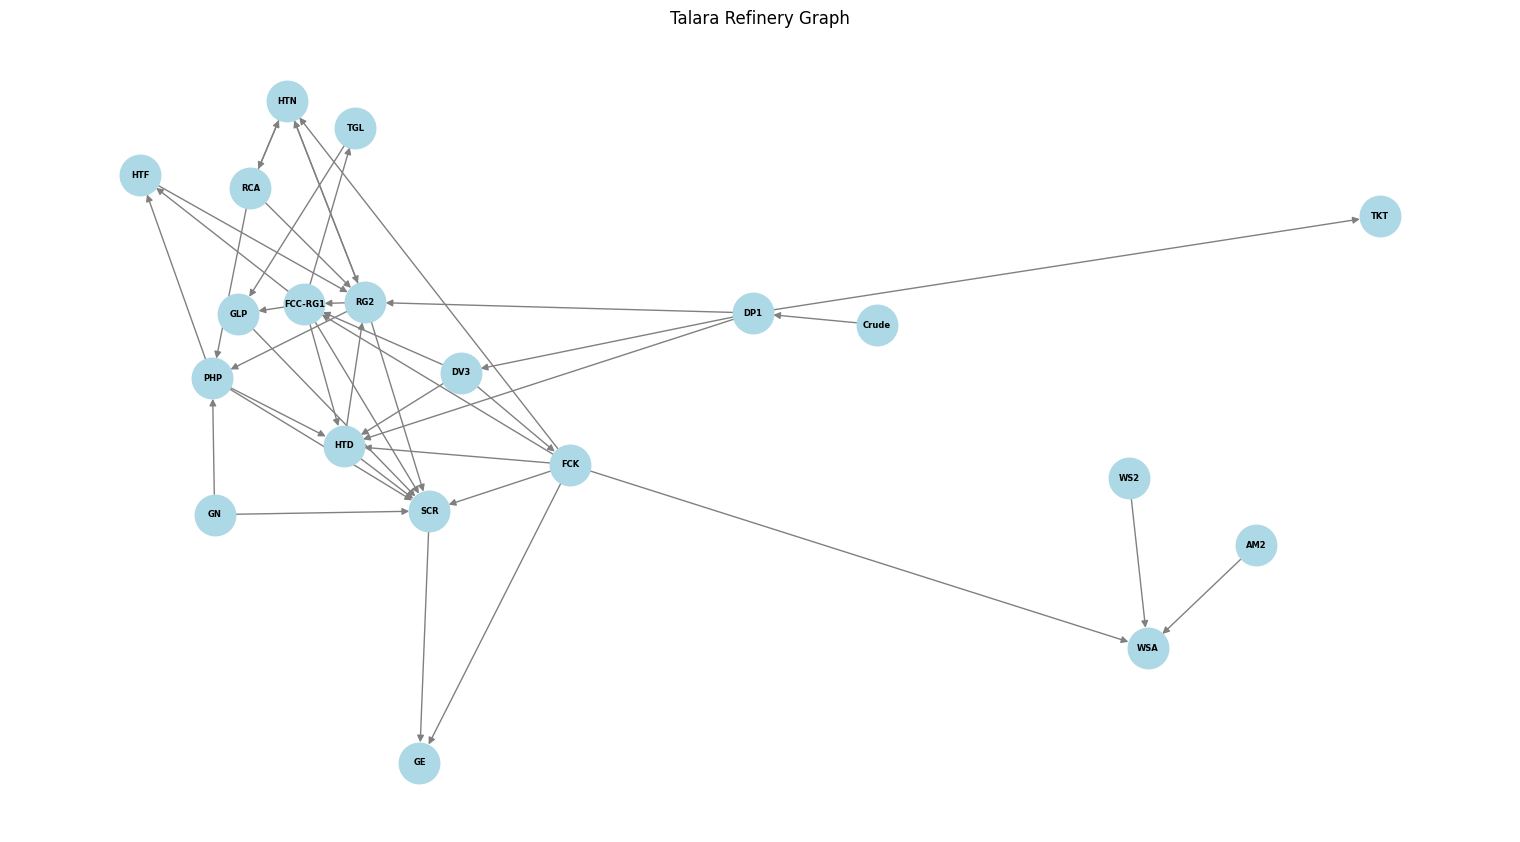

In [21]:
# Plot the graph
seed = 1 # for all the plots (try different seeds to get the best graph representation)
pos = nx.spring_layout(G, k=0.75, iterations=100, seed=seed)
plt.figure(figsize=(15, 8))
nx.draw(G, pos, with_labels=True, node_size=850, node_color="lightblue", font_size=6, font_weight="bold", edge_color="gray")

plt.title("Talara Refinery Graph")
plt.show()

## Clustering metrics

A value of 0 indicates no connections between the node's neighbors, i.e., no closed triangles. A value close to 1 indicates that most of the node's neighbors are connected to each other, forming a highly connected group. The clustering coefficient is a key measure for understanding community formation, social cohesion in social networks, and other phenomena in complex networks. In real-world contexts, it can provide insight into the redundancy of connections, the resilience of the network to failures, and the existence of well-connected subgroups. For example, imagine you have a group of friends. If all of your friends are also friends with each other, then you have a high clustering number (close to 1). If none of your friends know each other, you have a low clustering number (close to 0).

In [22]:
# Local clustering of the node FCK
nx.clustering(G, "FCK")

0.14285714285714285

In [23]:
# Global clustering coeficient
nx.average_clustering(G)

0.22488095238095238

In [24]:
# Calcular el coeficiente local de agrupamiento para cada nodo
local_clustering = nx.clustering(G)
# Convert to DataFrame
clustering_df = pd.DataFrame({"Clustering Coefficient": local_clustering})
clustering_df.sort_values(by="Clustering Coefficient", ascending=False)

,Clustering Coefficient
TGL,0.500000
GE,0.500000
GN,0.500000
RCA,0.500000
GLP,0.333333
HTF,0.333333
DV3,0.333333
HTD,0.261905
HTN,0.250000
PHP,0.200000


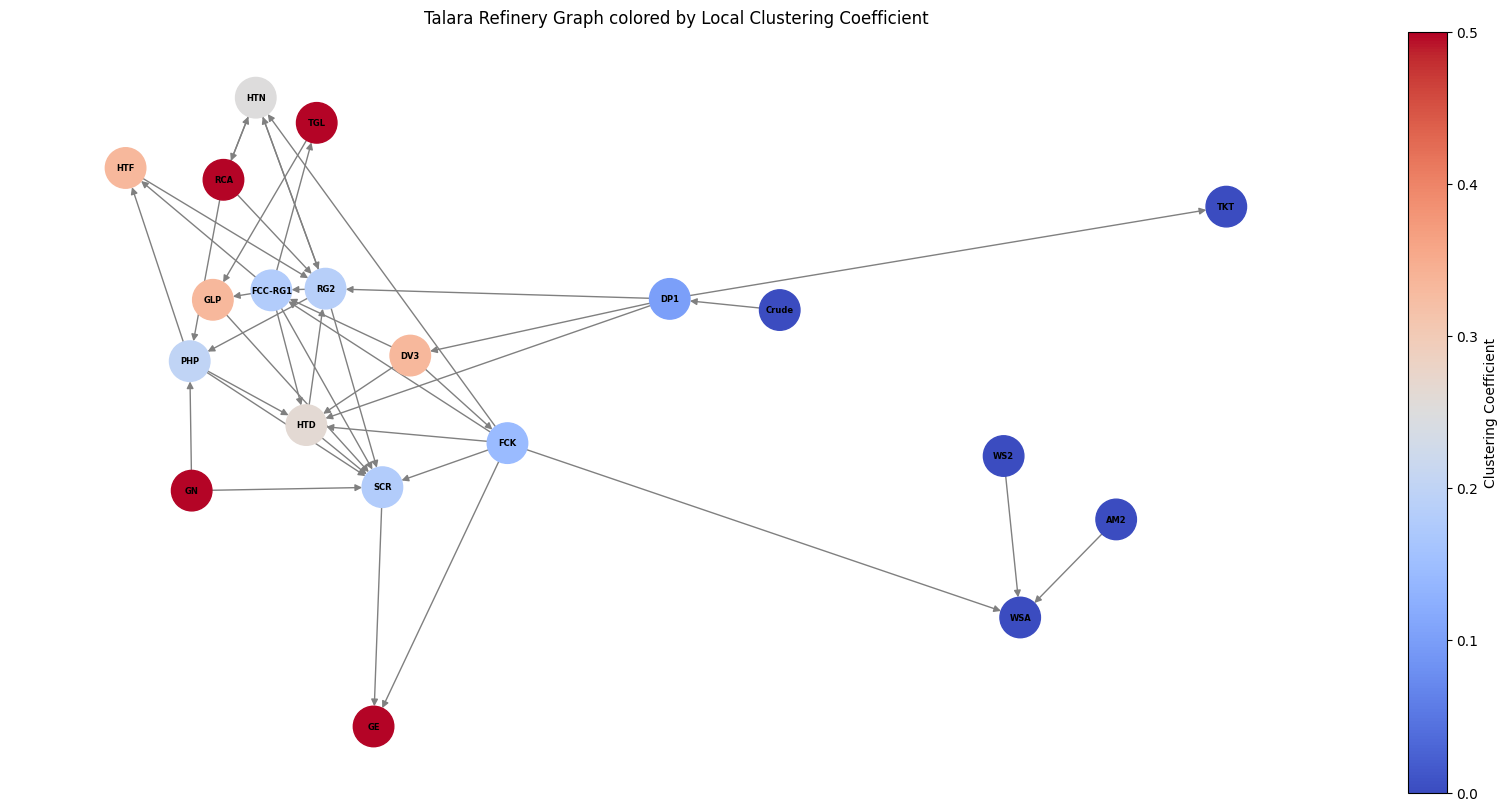

In [25]:
# Plot the graph colored by Local Clustering Coeficient

node_colors = [local_clustering[node] for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 8), layout='constrained')

pos = nx.spring_layout(G, k=0.75, iterations=100, seed=seed)

nx.draw(
    G,
    pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=850,
    font_size=6,
    font_weight="bold",
    edge_color="gray",
    with_labels=True,
)
plt.title("Talara Refinery Graph colored by Local Clustering Coefficient")

# Add a color bar
from matplotlib.cm import ScalarMappable
fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)), cmap='coolwarm'), ax=ax, orientation='vertical', label='Clustering Coefficient')

plt.show()

## Centrality metrics

1. **Degree Centrality:** The degree centrality of a node is simply the number of connections that node has in the network. In other words, it measures how many nodes are directly connected to a particular node. Nodes with high degree centrality are important nodes in terms of connections.

2. **Betweenness Centrality:** A node's betweenness centrality measures the extent to which that node acts as an intermediary in the shortest paths between other nodes in the network. Nodes with high betweenness are important for communication and information transfer between separate parts of the network.

3. **Closeness Centrality:** A node's closeness centrality measures how close that node is to all other nodes in terms of the length of their shortest paths. Nodes with high closeness centrality are efficient at spreading information throughout the network.

In [26]:
# Calculate centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Create a DataFrame
centralities_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality
})

# Show the DataFrame sorted by Degree Centrality
centralities_df.sort_values(by='Degree Centrality', ascending=False)

,Degree Centrality,Betweenness Centrality,Closeness Centrality
RG2,0.473684,0.156433,0.353801
FCC-RG1,0.421053,0.082846,0.276888
SCR,0.421053,0.033138,0.468900
FCK,0.368421,0.020468,0.078947
HTD,0.368421,0.037524,0.335180
PHP,0.315789,0.043860,0.276888
DP1,0.263158,0.043860,0.052632
HTN,0.263158,0.032651,0.265351
RCA,0.210526,0.004386,0.187307
DV3,0.210526,0.024366,0.070175


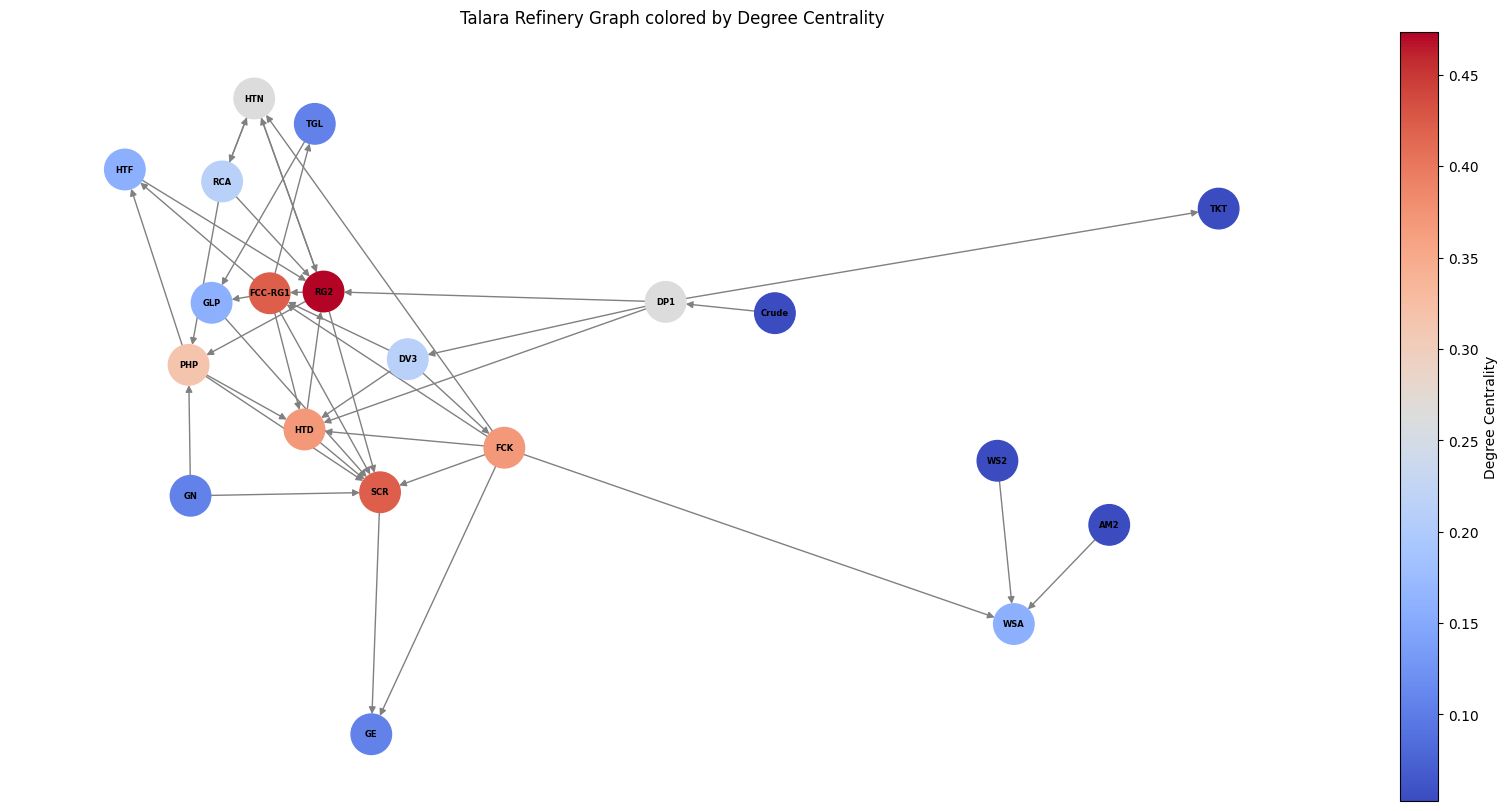

In [43]:
# Plot the graph colored by Degree Centrality
node_colors = [degree_centrality[node] for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 8), layout='constrained')

pos = nx.spring_layout(G, k=0.75, iterations=100, seed=seed)

nx.draw(
    G,
    pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=850,
    font_size=6,
    font_weight="bold",
    edge_color="gray",
    with_labels=True,
)
plt.title("Talara Refinery Graph colored by Degree Centrality")

# Add a color bar
from matplotlib.cm import ScalarMappable
fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)), cmap='coolwarm'), ax=ax, orientation='vertical', label='Degree Centrality')

plt.savefig('talara_refinery_graph.png', dpi=300, bbox_inches="tight")

plt.show()

In [28]:
# Show the DataFrame sorted by Betweenness Centrality
centralities_df.sort_values(by='Betweenness Centrality', ascending=False)

,Degree Centrality,Betweenness Centrality,Closeness Centrality
RG2,0.473684,0.156433,0.353801
FCC-RG1,0.421053,0.082846,0.276888
PHP,0.315789,0.043860,0.276888
DP1,0.263158,0.043860,0.052632
HTD,0.368421,0.037524,0.335180
SCR,0.421053,0.033138,0.468900
HTN,0.263158,0.032651,0.265351
DV3,0.210526,0.024366,0.070175
HTF,0.157895,0.023392,0.254737
FCK,0.368421,0.020468,0.078947


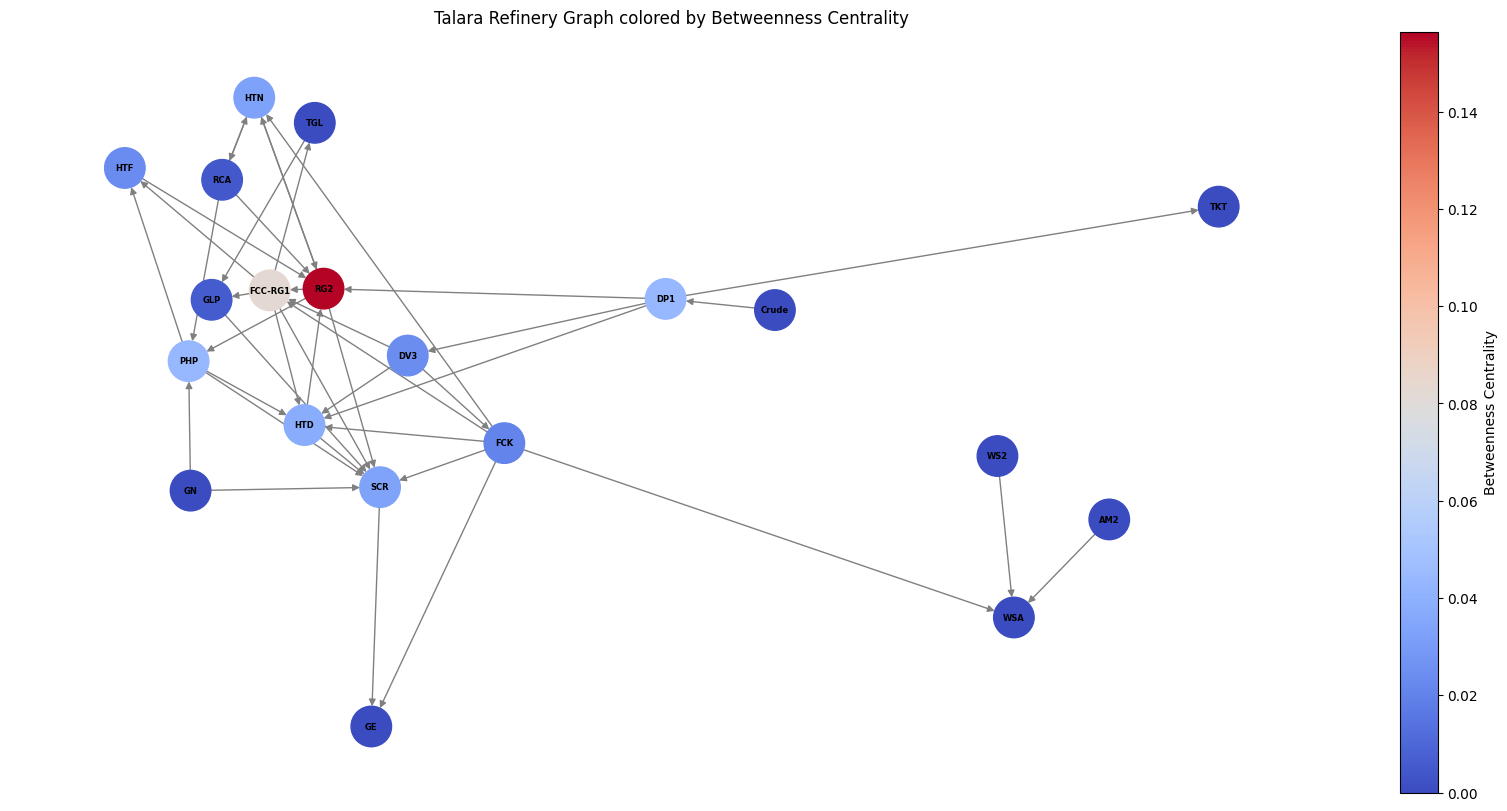

In [29]:
# Plot the graph colored by Betweenness Centrality
node_colors = [betweenness_centrality[node] for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 8), layout='constrained')

pos = nx.spring_layout(G, k=0.75, iterations=100, seed=seed)

nx.draw(
    G,
    pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=850,
    font_size=6,
    font_weight="bold",
    edge_color="gray",
    with_labels=True,
)
plt.title("Talara Refinery Graph colored by Betweenness Centrality")

# Add a color bar
from matplotlib.cm import ScalarMappable
fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)), cmap='coolwarm'), ax=ax, orientation='vertical', label='Betweenness Centrality')

plt.show()

In [30]:
# Show the DataFrame sorted by Closeness Centrality
centralities_df.sort_values(by='Closeness Centrality', ascending=False)

,Degree Centrality,Betweenness Centrality,Closeness Centrality
SCR,0.421053,0.033138,0.468900
RG2,0.473684,0.156433,0.353801
GE,0.105263,0.000000,0.338346
HTD,0.368421,0.037524,0.335180
FCC-RG1,0.421053,0.082846,0.276888
PHP,0.315789,0.043860,0.276888
HTN,0.263158,0.032651,0.265351
HTF,0.157895,0.023392,0.254737
GLP,0.157895,0.005848,0.247076
TGL,0.105263,0.000000,0.216541


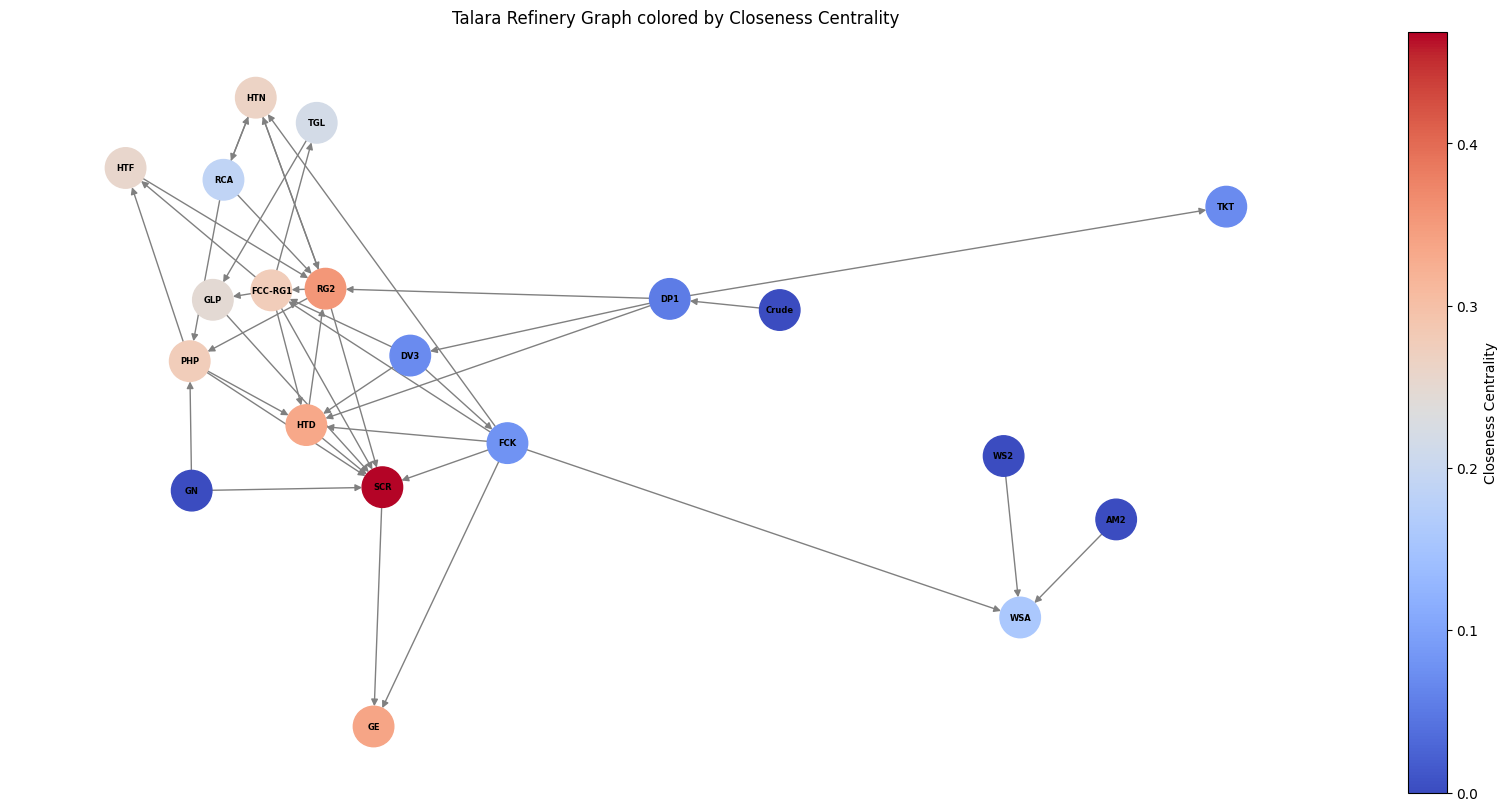

In [31]:
# Plot the graph colored by Closeness Centrality
node_colors = [closeness_centrality[node] for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 8), layout='constrained')

pos = nx.spring_layout(G, k=0.75, iterations=100, seed=seed)

nx.draw(
    G,
    pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=850,
    font_size=6,
    font_weight="bold",
    edge_color="gray",
    with_labels=True,
)
plt.title("Talara Refinery Graph colored by Closeness Centrality")

# Add a color bar
from matplotlib.cm import ScalarMappable
fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)), cmap='coolwarm'), ax=ax, orientation='vertical', label='Closeness Centrality')

plt.show()

## Communities detection

Find communities in G using greedy modularity maximization.

Greedy modularity maximization is a method used in network analysis to detect communities within a graph. It seeks to group nodes into clusters by maximizing modularity, a metric that measures the strength of connections within clusters compared to connections between clusters. For example, imagine a social network where people form friend groups. If most friendships happen within each group and very few happen between groups, the network has high modularity (strong communities). If friendships are spread everywhere without clear groups, modularity is low.


The greedy modularity maximization function uses Clauset-Newman-Moore greedy modularity maximization to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum). Two keyword arguments adjust the stopping condition. cutoff is a lower limit on the number of communities so you can stop the process before reaching a maximum (used to save computation time). best_n is an upper limit on the number of communities so you can make the process continue until at most n communities remain even if the maximum modularity occurs for more. To obtain exactly n communities, set both cutoff and best_n to n.

In [32]:
communities = nx.community.greedy_modularity_communities(G, weight=None, resolution=1, cutoff=1, best_n=None) # default set
# communities = nx.community.greedy_modularity_communities(G, weight='flow', resolution=1, cutoff=1, best_n=None)
print("Comunidades detectadas:", communities)

Comunidades detectadas: [frozenset({'DV3', 'FCK', 'Crude', 'DP1', 'TKT', 'HTD'}), frozenset({'HTF', 'GLP', 'FCC-RG1', 'TGL'}), frozenset({'GE', 'GN', 'PHP', 'SCR'}), frozenset({'RCA', 'HTN', 'RG2'}), frozenset({'WSA', 'WS2', 'AM2'})]


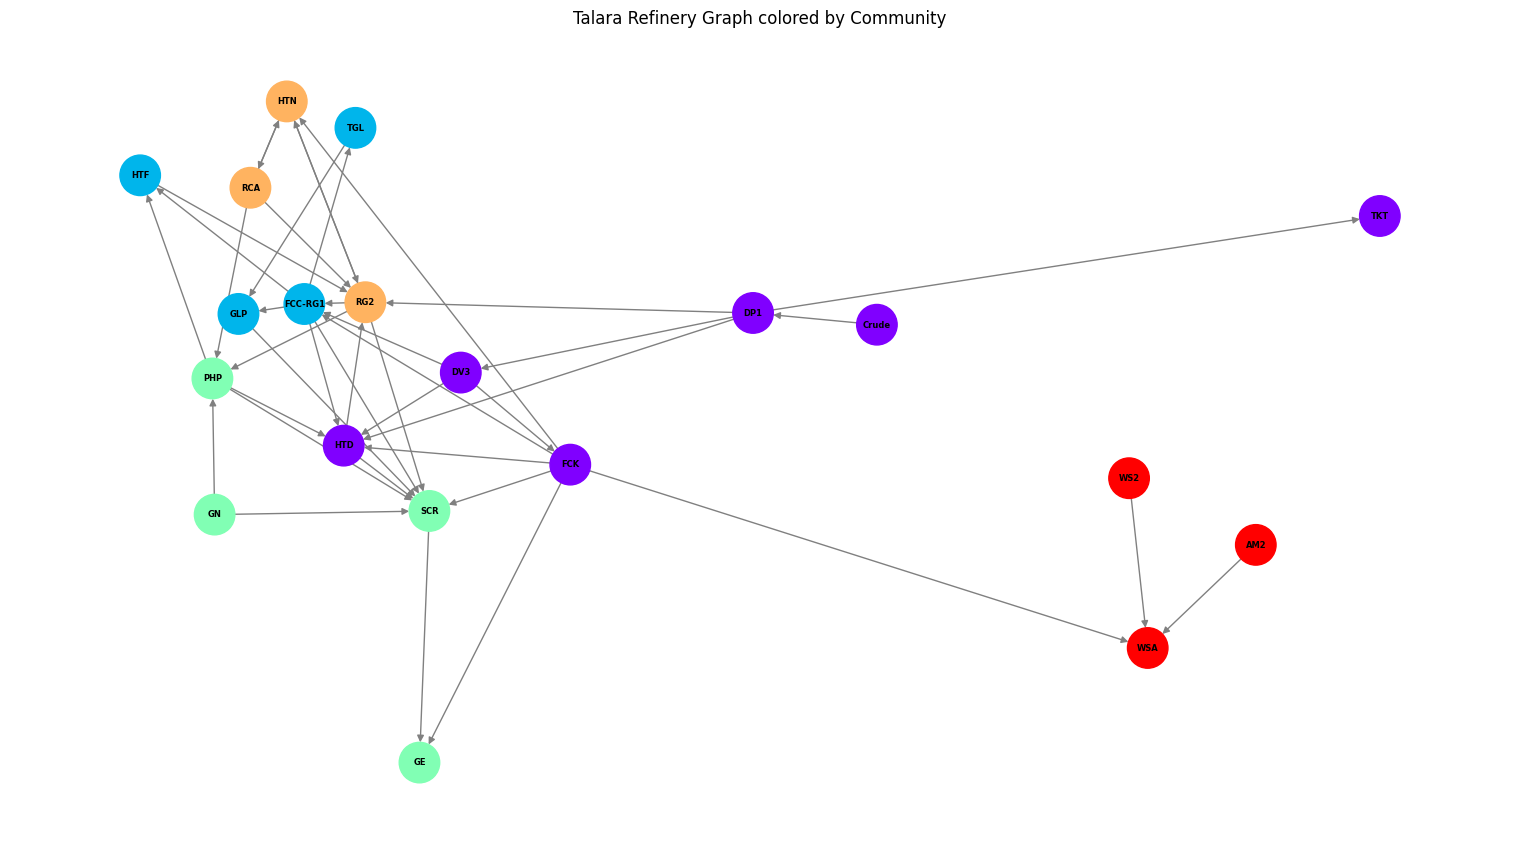

In [40]:
# Create a dictionary to asign colors to the nodes by community
color_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        color_map[node] = i

# Node positions
pos = nx.spring_layout(G, k=0.75, iterations=100, seed=seed)

# Plot the graph with nodes colored by community
plt.figure(figsize=(15, 8))
nx.draw(
    G,
    pos,
    node_color=[color_map[node] for node in G.nodes()],
    cmap=plt.cm.rainbow,
    node_size=850,
    font_size=6,
    font_weight="bold",
    edge_color="gray",
    with_labels=True,
)
plt.title("Talara Refinery Graph colored by Community")

plt.savefig('talara_refinery_graph_communities.pdf')

plt.show()

## Graph division

The question of which node to remove to split the network can be answered using the concept of the "betweenness centrality" metric. This metric identifies nodes that act as key bridges between different parts of the network. By removing a node with high betweenness centrality, the network is more likely to split into smaller components.

In [34]:
# Identify the node with the highest betweenness centrality
node_to_remove = max(betweenness_centrality, key=betweenness_centrality.get)
#node_to_remove = "FCK" # try different nodes
node_to_remove

'RG2'

In [35]:
# Remove the node
G_removed = G.copy()
G_removed.remove_node(node_to_remove)

In [36]:
# Check if the graph is divided
if nx.is_strongly_connected(G_removed):
  print("Graph remains strongly connected.")
else:
  print("Graph is no longer strongly connected.")

Graph is no longer strongly connected.


In [37]:
# Identify components after removal
components = list(nx.strongly_connected_components(G_removed))
print(f"Remaining components: {components}")

Remaining components: [{'GE'}, {'SCR'}, {'HTD'}, {'HTF'}, {'GLP'}, {'TGL'}, {'FCC-RG1'}, {'PHP'}, {'RCA', 'HTN'}, {'WSA'}, {'FCK'}, {'DV3'}, {'TKT'}, {'DP1'}, {'Crude'}, {'GN'}, {'AM2'}, {'WS2'}]


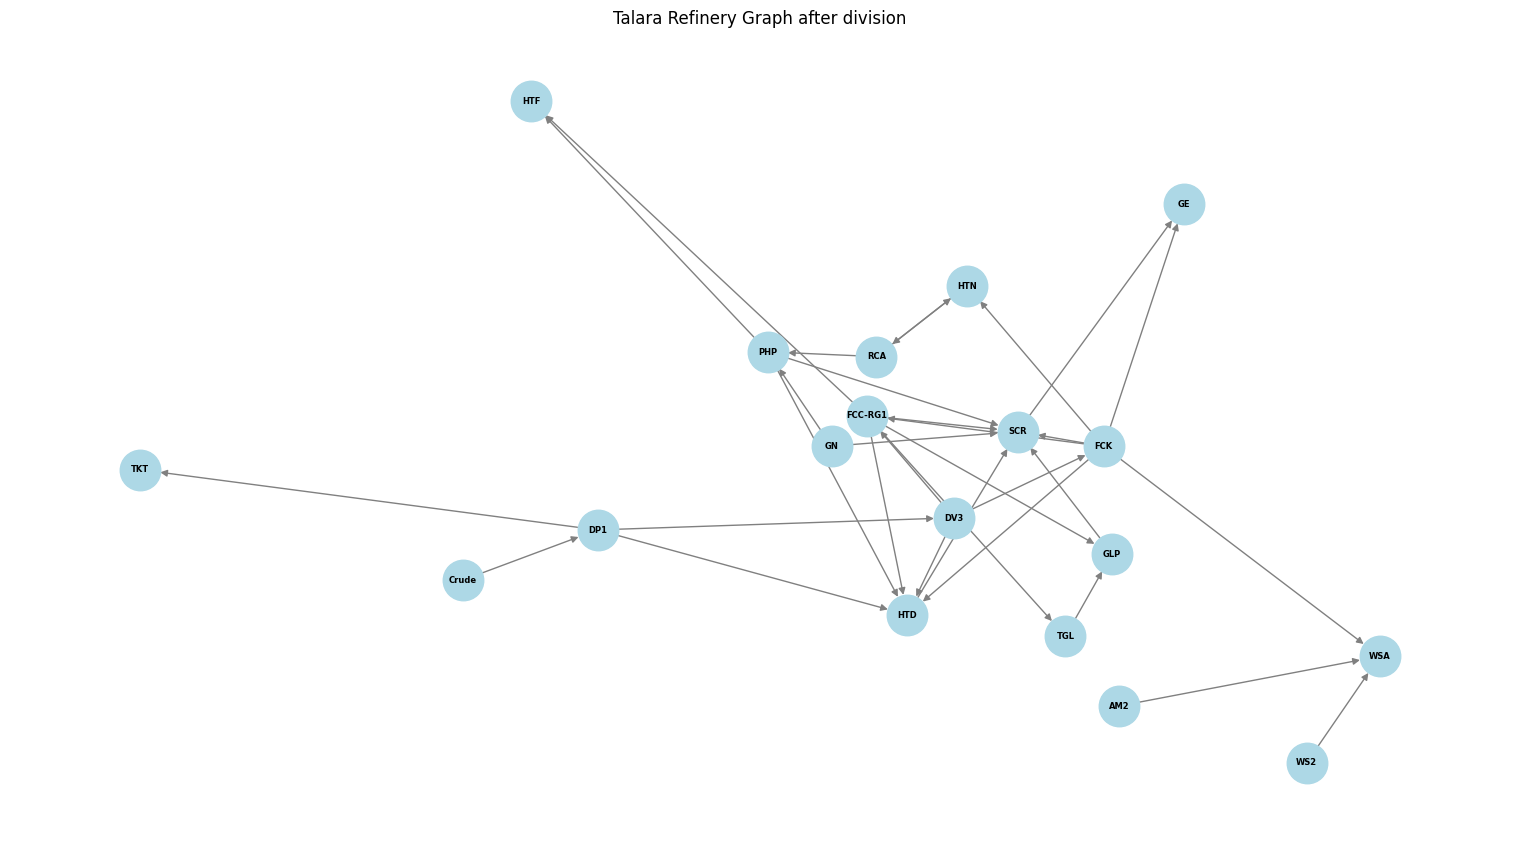

In [38]:
# Plot the modified graph
pos = nx.spring_layout(G_removed,  k=0.75, iterations=100, seed=seed)
plt.figure(figsize=(15, 8))
nx.draw(G_removed, pos, with_labels=True, node_size=850, node_color="lightblue", font_size=6, font_weight="bold", edge_color="gray")

plt.title("Talara Refinery Graph after division")
plt.show()